In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import patches
from pathlib import Path
import json
import gzip
import h5py
import random
from pol.utils.validation.scene_saver import load_scenes, count_h5_keys
from pol.datasets.objdetect import COCODataset, collate_padding_fn
from torch.utils.data import DataLoader, Dataset

In [5]:
# scene_path = '../../tests/objdetect/scenes/full_spe/pol_res_mot/step-1000000.h5'
scene_path = '../../tests/objdetect/scenes/full_spe/gol_res_mlr/step-1000000.h5'
scenes = load_scenes(scene_path, unroll=False)
eval_itr = 5000
split = 'validation'

In [6]:
def draw_img(ax, img, boxes=None, gt_boxes=None, lw=3.0):
    #img = torch.permute(img, [1, 2, 0])
    #ax.xaxis.tick_top()
    ax.imshow(img)
    
    if boxes is not None:
        for box in boxes:
            x, y, w, h = box
            x -= 0.5 * w
            y -= 0.5 * h
            x *= img.shape[1]
            y *= img.shape[0]
            w *= img.shape[1]
            h *= img.shape[0]
            ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor='orange', lw=lw))
        
    if gt_boxes is not None:
        for box in gt_boxes:
            x, y, w, h = box
            x -= 0.5 * w
            y -= 0.5 * h
            x *= img.shape[1]
            y *= img.shape[0]
            w *= img.shape[1]
            h *= img.shape[0]
            ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor='green', lw=lw))


KeyError: "Unable to open object (object 'itr_5000' doesn't exist)"

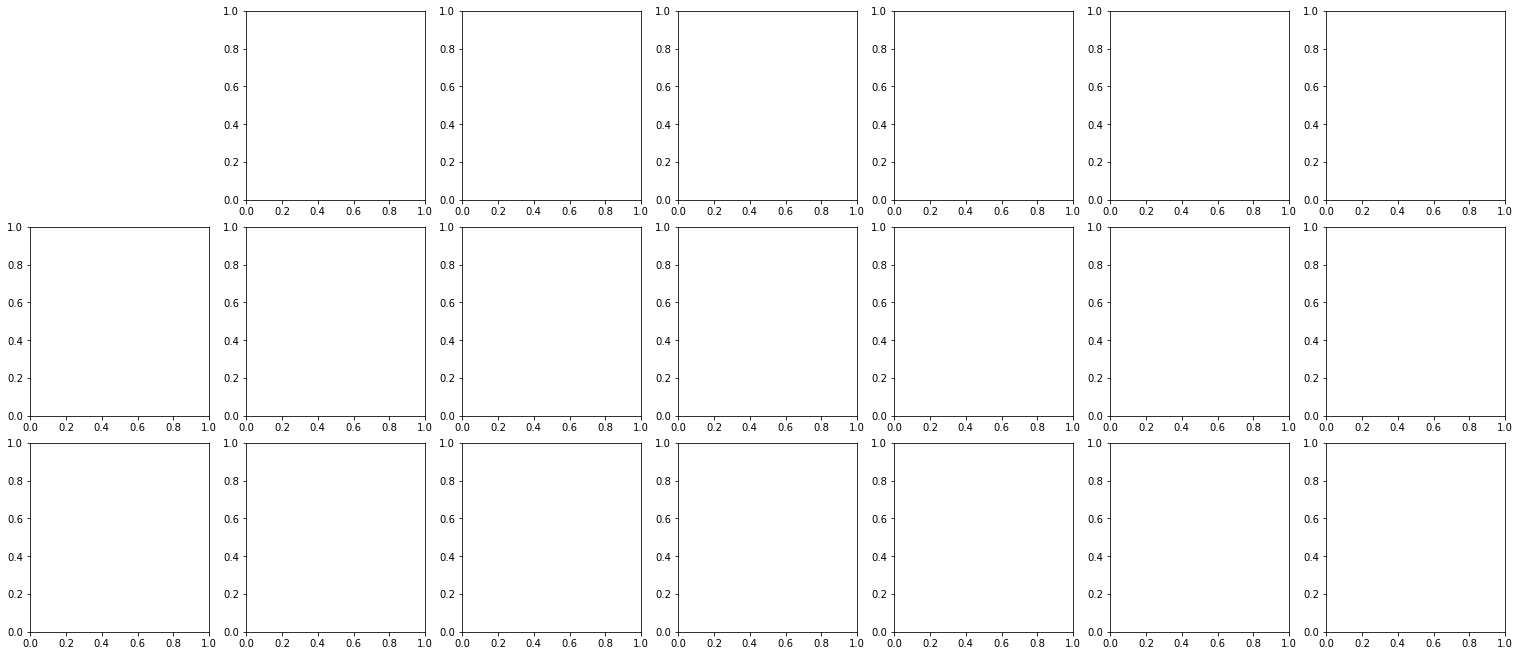

In [7]:
from PIL import Image
import torchvision
import copy

def vis_grid():
    #rng = np.random.default_rng(42)
    rng = np.random.default_rng(45)

    figsize = 3
    # num_row=10
    # num_col=7
    num_row=3
    num_col=7

    perm = rng.permutation(len(scenes))
    fig, axes = plt.subplots(num_row, num_col,
                            squeeze=False, constrained_layout=True)
    fig.set_size_inches(figsize*num_col, figsize*num_row)

    for r in range(num_row):
        for c in range(num_col):
            ax = axes[r, c]
            ax.axis('off')
            # ax.set_xticklabels([])
            # ax.set_yticklabels([])
            ax.set_aspect('equal')
            j = perm[r * num_col + c]
            img = scenes[j]['gt']['img'][:] / 255
            img = np.transpose(img, (1, 2, 0))
            gt_boxes = scenes[j]['gt']['boxes'][:]
            boxes = scenes[j][f'itr_{eval_itr}']['boxes'][:]
            draw_img(ax, img, boxes=boxes)#, gt_boxes=gt_boxes)

vis_grid()

In [ ]:
def vis_gradual():
    # Good img ids: 1538, 1012, 2519, 964, 1401, 500, 1921, 3760, 1752, 553, 2861, 2255, 3701
    
    rng = np.random.default_rng(26)
    
    figsize = 3
    num_row=20
    num_col=5
    
    itrs = [0, 1, 2, 3, 4]

    perm = rng.permutation(len(scenes))
    perm = [500, 3701]
    num_row = len(perm)
    
    fig, axes = plt.subplots(num_row, num_col,
                            squeeze=False, constrained_layout=True)
    fig.set_size_inches(figsize*num_col, figsize*num_row)
    print(perm[:num_row])
    for r in range(num_row):
        for c in range(num_col):
            ax = axes[r, c]
            ax.axis('off')
            # ax.set_xticklabels([])
            # ax.set_yticklabels([])
            ax.set_aspect('equal')
            j = perm[r]
            img = scenes[j]['gt']['img'][:] / 255
            img = np.transpose(img, (1, 2, 0))
            boxes = scenes[j][f'itr_{itrs[c]}']['boxes'][:20]
            draw_img(ax, img, boxes=boxes)#, gt_boxes=gt_boxes)
            
#vis_gradual()